In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv(r"C:\Users\hithe\Downloads\student\student-por.csv", sep = ";")

In [3]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [4]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
numeric_cols = [col for col in data.columns if col not in data.select_dtypes("object").columns]

In [6]:
df = data[numeric_cols]

In [7]:
df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,2,5,4,10,11,10
645,18,3,1,1,2,0,4,3,4,1,1,1,4,15,15,16
646,18,1,1,2,2,0,1,1,1,1,1,5,6,11,12,9
647,17,3,1,2,1,0,2,4,5,3,4,2,6,10,10,10


In [8]:
import numpy as np
for i in range(1,4):
    for j in range(df.shape[0]):
        random_noise = round(np.random.rand()-0.5,2)
        df.loc[j,'G'+str(i)] = df.loc[j,'G'+str(i)] + random_noise

In [9]:
df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,-0.12,11.20,10.74
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9.43,10.64,11.10
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12.05,13.27,11.80
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14.23,14.34,13.69
4,16,3,3,1,2,0,4,3,2,1,2,5,0,10.88,12.53,12.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,2,5,4,9.72,10.64,9.79
645,18,3,1,1,2,0,4,3,4,1,1,1,4,15.27,15.46,16.07
646,18,1,1,2,2,0,1,1,1,1,1,5,6,11.00,12.05,9.22
647,17,3,1,2,1,0,2,4,5,3,4,2,6,9.77,9.60,10.31


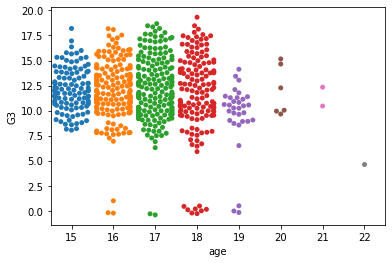

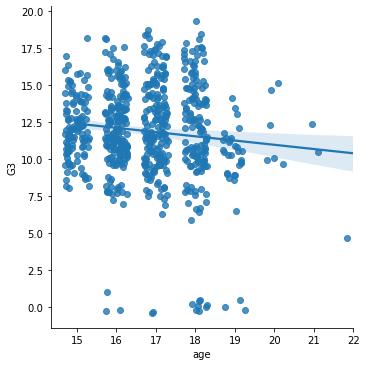

In [10]:
sns.swarmplot(data = df, x = "age", y = "G3")
sns.lmplot(data = df, x = "age", y = "G3", x_jitter = 0.3)

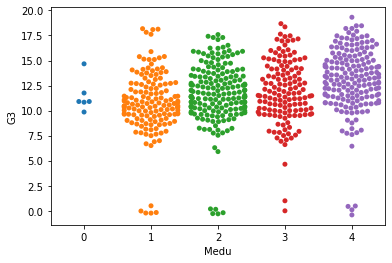

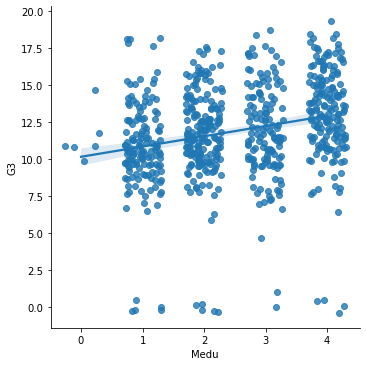

In [11]:
sns.swarmplot(data = df, x = "Medu", y = "G3")
sns.lmplot(data = df, x = "Medu", y = "G3", x_jitter = 0.3)

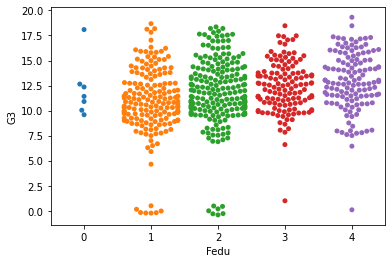

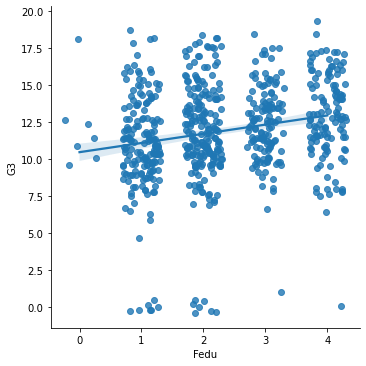

In [12]:
sns.swarmplot(data = df, x = "Fedu", y = "G3")
sns.lmplot(data = df, x = "Fedu", y = "G3", x_jitter = 0.3)

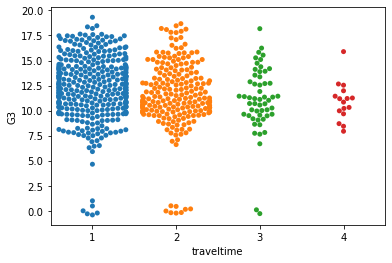

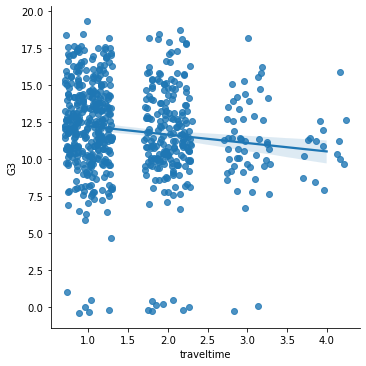

In [13]:
sns.swarmplot(data = df, x = "traveltime", y = "G3")
sns.lmplot(data = df, x = "traveltime", y = "G3", x_jitter = 0.3)

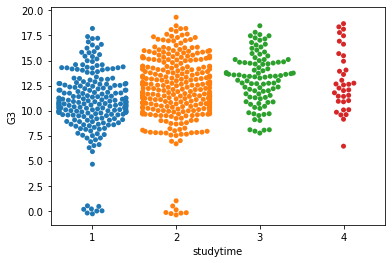

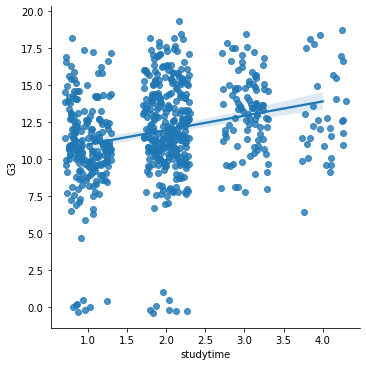

In [14]:
sns.swarmplot(data = df, x = "studytime", y = "G3")
sns.lmplot(data = df, x = "studytime", y = "G3", x_jitter = 0.3)

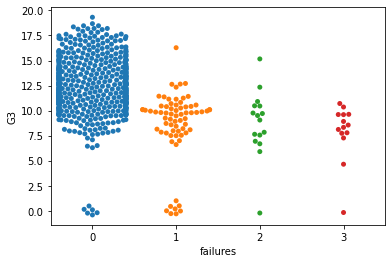

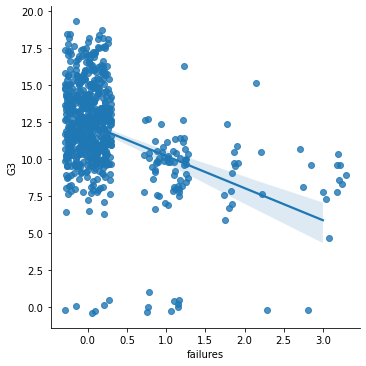

In [15]:
sns.swarmplot(data = df, x = "failures", y = "G3")
sns.lmplot(data = df, x = "failures", y = "G3", x_jitter = 0.3)

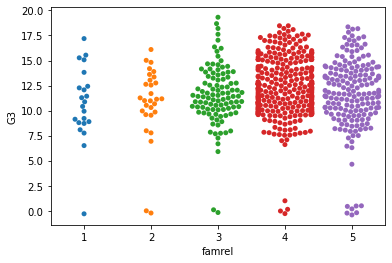

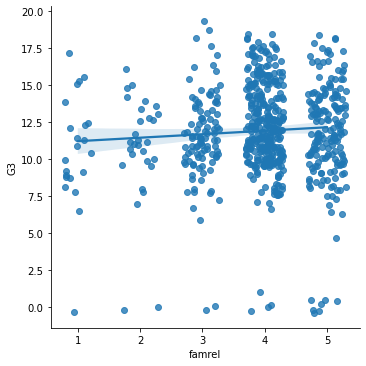

In [16]:
sns.swarmplot(data = df, x = "famrel", y = "G3")
sns.lmplot(data = df, x = "famrel", y = "G3", x_jitter = 0.3)

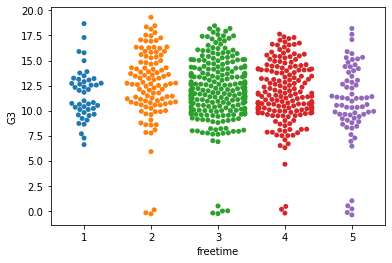

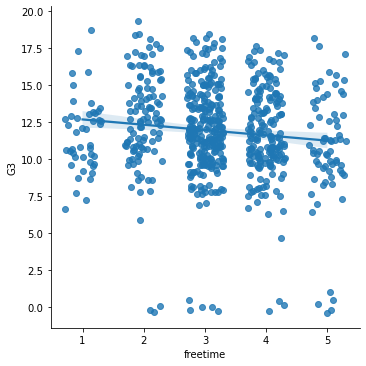

In [17]:
sns.swarmplot(data = df, x = "freetime", y = "G3")
sns.lmplot(data = df, x = "freetime", y = "G3", x_jitter = 0.3)

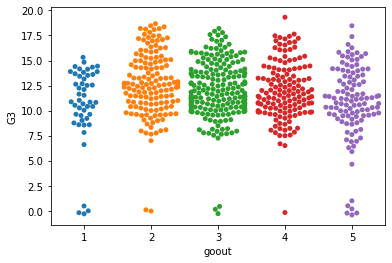

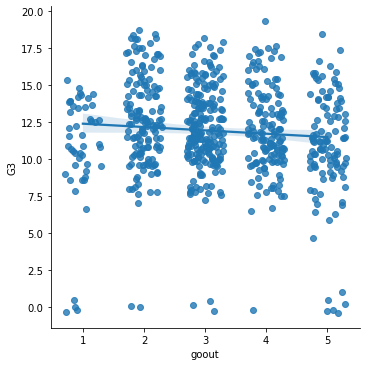

In [18]:
sns.swarmplot(data = df, x = "goout", y = "G3")
sns.lmplot(data = df, x = "goout", y = "G3", x_jitter = 0.3)

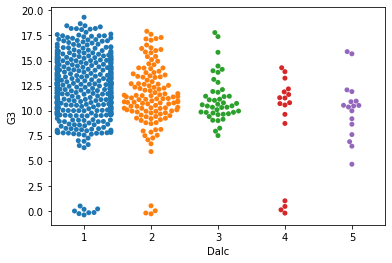

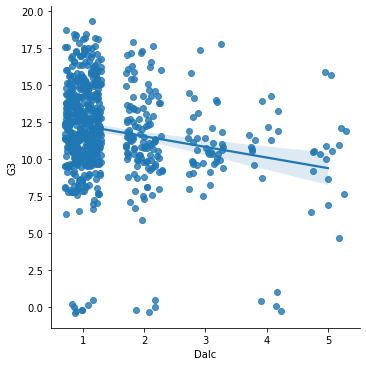

In [19]:
sns.swarmplot(data = df, x = "Dalc", y = "G3")
sns.lmplot(data = df, x = "Dalc", y = "G3", x_jitter = 0.3)

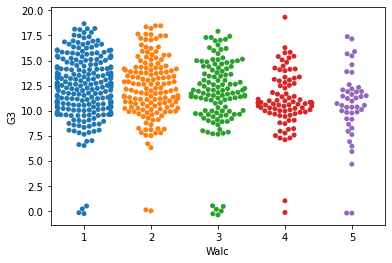

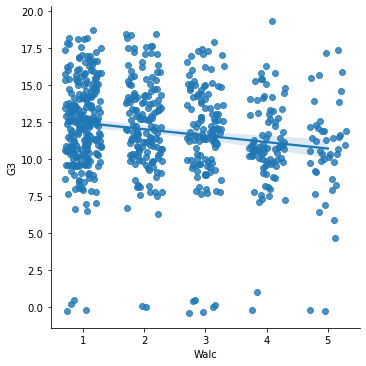

In [20]:
sns.swarmplot(data = df, x = "Walc", y = "G3")
sns.lmplot(data = df, x = "Walc", y = "G3", x_jitter = 0.3)

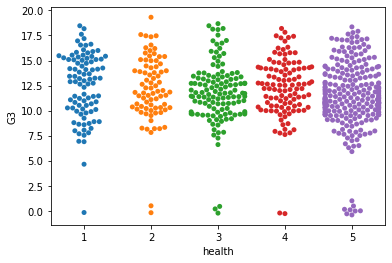

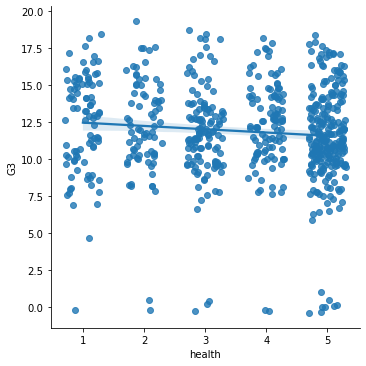

In [21]:
sns.swarmplot(data = df, x = "health", y = "G3")
sns.lmplot(data = df, x = "health", y = "G3", x_jitter = 0.3)

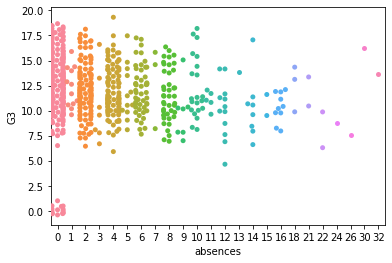

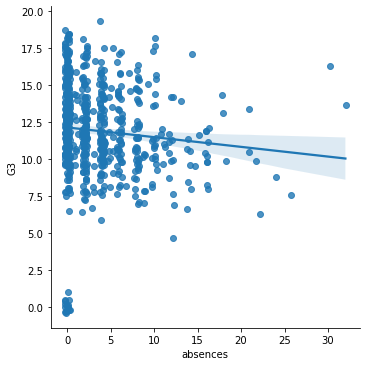

In [22]:
sns.swarmplot(data = df, x = "absences", y = "G3")
sns.lmplot(data = df, x = "absences", y = "G3", x_jitter = 0.3)

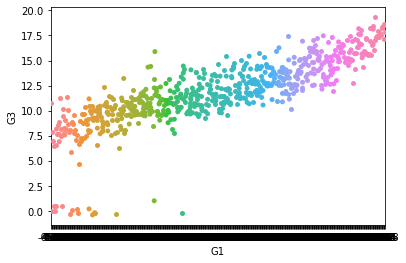

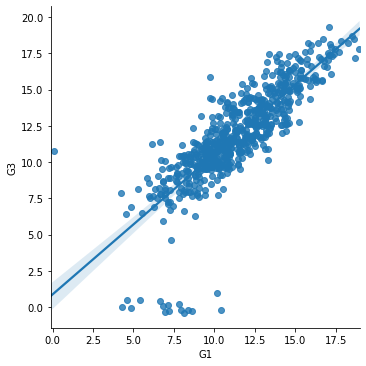

In [23]:
sns.swarmplot(data = df, x = "G1", y = "G3")
sns.lmplot(data = df, x = "G1", y = "G3", x_jitter = 0.3)

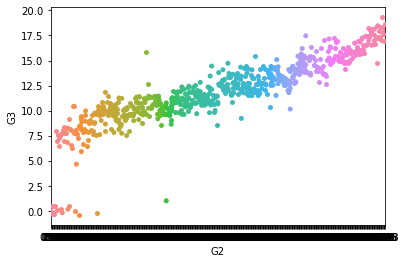

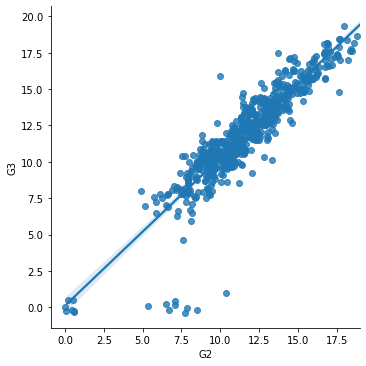

In [24]:
sns.swarmplot(data = df, x = "G2", y = "G3")
sns.lmplot(data = df, x = "G2", y = "G3", x_jitter = 0.3)

In [25]:
df.corr()["G3"]

age          -0.107272
Medu          0.241824
Fedu          0.209826
traveltime   -0.130715
studytime     0.246520
failures     -0.395920
famrel        0.069147
freetime     -0.115749
goout        -0.081657
Dalc         -0.204049
Walc         -0.172241
health       -0.098913
absences     -0.093683
G1            0.819669
G2            0.910098
G3            1.000000
Name: G3, dtype: float64

Medu

Fedu

studytime

failures

Dalc

In [26]:
cols = ["G1","G2","G3", "studytime","failures"]
cols = ["G1","G2","G3"]
sub_df = df[cols]
sub_df = sub_df.sort_values("G1").reset_index()

In [27]:
predictor_cols = [col for col in cols if col!="G3"]
X = sub_df[predictor_cols]
y = sub_df["G3"]

lr = LinearRegression()

lr.fit(X,y)
pred = lr.predict(X)
score = r2_score(pred,y)
score

0.8022298577021765

In [28]:
lr.coef_

array([0.1840185 , 0.86784492])

In [29]:
sub_df.head()

,index,G1,G2,G3
0,0,-0.12,11.20,10.74
1,569,4.21,7.94,7.84
2,567,4.37,0.14,0.00
3,572,4.64,5.05,6.94
4,523,4.65,5.99,6.45


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

Best Subset Selection

In [31]:
target = "G3"
lr = LinearRegression()

scores = []
for feature in ["G1","G2"]:
    X = sub_df[[feature]]
    y = sub_df[target]
    lr.fit(X,y)
    pred = lr.predict(X)
    score = r2_score(pred,y)
    scores.append(score)
    
X = sub_df[["G1","G2"]]
y = sub_df["G3"]
lr.fit(X,y)

pred = lr.predict(X)
score = r2_score(pred,y)
scores.append(score)

scores = np.array(scores)
arg_max = np.where(scores == max(scores))
if(arg_max == 0):
    optimal_features = ["G1"]
elif(arg_max == 1):
    optimal_features = ["G2"]
else:
    optimal_features = ["G1","G2"]

print(optimal_features)

['G1', 'G2']


In [32]:
def VIF(optimal_features, df):
    vif_dict = {}
    for feature in optimal_features:
        other = [x for x in optimal_features if x != feature][0]
        X = df[[feature]]
        y = df[other]
        lr = LinearRegression()
        lr.fit(X,y)
        pred = lr.predict(X)
        score = r2_score(pred,y)
        vif = 1/(1-score)
        vif_dict[feature] = vif
    return vif_dict

In [33]:
VIF(optimal_features,sub_df)

{'G1': 2.6990795641849763, 'G2': 2.699079564184978}

In [34]:
X = sub_df[optimal_features]
y = sub_df["G3"]
lr.fit(X,y)
pred = lr.predict(X)
res = np.array(pred - y)

sub_df["pred"] = pred
sub_df["res"] = res

In [35]:
sub_df

,index,G1,G2,G3,pred,res
0,0,-0.12,11.20,10.74,9.435977,-1.304023
1,569,4.21,7.94,7.84,7.403602,-0.436398
2,567,4.37,0.14,0.00,0.663855,0.663855
3,572,4.64,5.05,6.94,4.974658,-1.965342
4,523,4.65,5.99,6.45,5.792273,-0.657727
...,...,...,...,...,...,...
644,113,18.33,16.85,18.20,17.734442,-0.465558
645,594,18.40,17.52,18.47,18.328779,-0.141221
646,344,18.44,17.59,17.19,18.396889,1.206889
647,338,18.45,18.98,18.68,19.605034,0.925034


<AxesSubplot:xlabel='G1', ylabel='res'>

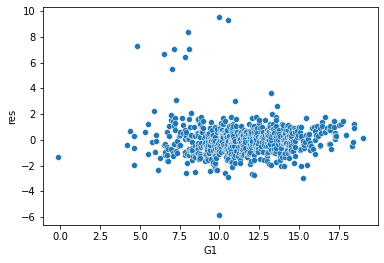

In [36]:
sns.scatterplot(data = sub_df, x = "G1", y = "res" )

In [37]:
mu = np.mean(sub_df["res"])
sigma = np.std(sub_df["res"])
sub_sub_df = sub_df[sub_df["res"] > mu - 1.96*sigma]
sub_sub_df = sub_sub_df[sub_df["res"] < mu + 1.96*sigma]

<AxesSubplot:xlabel='G1', ylabel='res'>

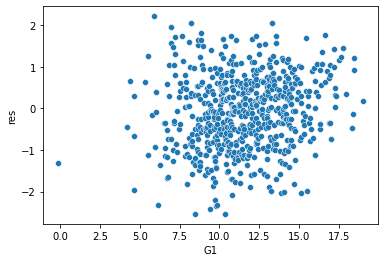

In [38]:
sns.scatterplot(data = sub_sub_df, x = "G1", y = "res" )

In [39]:
sub_sub_df

,index,G1,G2,G3,pred,res
0,0,-0.12,11.20,10.74,9.435977,-1.304023
1,569,4.21,7.94,7.84,7.403602,-0.436398
2,567,4.37,0.14,0.00,0.663855,0.663855
3,572,4.64,5.05,6.94,4.974658,-1.965342
4,523,4.65,5.99,6.45,5.792273,-0.657727
...,...,...,...,...,...,...
644,113,18.33,16.85,18.20,17.734442,-0.465558
645,594,18.40,17.52,18.47,18.328779,-0.141221
646,344,18.44,17.59,17.19,18.396889,1.206889
647,338,18.45,18.98,18.68,19.605034,0.925034


In [43]:
from scipy.stats import bartlett
stat, p = bartlett(sub_sub_df.loc[:100,"res"],sub_sub_df.loc[100:200,"res"],sub_sub_df.loc[200:300,"res"], sub_sub_df.loc[300:400,"res"],sub_sub_df.loc[400:500,"res"], sub_sub_df.loc[500:,"res"])
print("Bartlett Statistic:", stat)
print("p-value:", p)
if(p > 0.05):
    print("Not enough evidence to reject null hypothesis. The k samples have equal variance.")

Bartlett Statistic: 10.136169534524553
p-value: 0.0714676130374925
Not enough evidence to reject null hypothesis. The k samples have equal variance.


In [44]:
from scipy import stats
shapiro_test = stats.shapiro(sub_sub_df["res"])
print("Shapiro Wilks Test Statistic:", shapiro_test[0])
print("p-value:", shapiro_test[1])
if(p > 0.05):
    print("Not enough evidence to reject null hypothesis. The input data is normal")

Shapiro Wilks Test Statistic: 0.9958868622779846
p-value: 0.09756013005971909
Not enough evidence to reject null hypothesis. The input data is normal


In [52]:
X = sub_sub_df[["G1","G2"]]
y = sub_sub_df["G3"]

n = X.shape[0]
p = X.shape[1]


XtX_inv = np.linalg.inv(np.dot(np.transpose(X), X))
XtX_inv_1 = XtX_inv[0][0]
XtX_inv_2 = XtX_inv[1][1]
RSS = np.dot(np.transpose(y - np.dot(X,lr.coef_)), (y - np.dot(X,lr.coef_)))
RSE2 = RSS/(n-p)
             
t1 = lr.coef_[0]/(np.sqrt(RSE2)*XtX_inv_1)
t2 = lr.coef_[1]/(np.sqrt(RSE2)*XtX_inv_2)

p1 = stats.t.sf(np.abs(t1), n-p)*2
p2 = stats.t.sf(np.abs(t2), n-p)*2


print("Degrees of freedom:", n-p)
print("T statistic for G1:", t1)
print("p-value for G1:",p1)
if(p1<0.05):
    print("Reject null hypothesis. G1 has a significant effect on the target variable G3")

print("\n")

print("Degrees of freedom:", n-p)
print("T statistic for G2:", t2)
print("p-value for G2:", p2)
if(p2<0.05):
    print("Reject null hypothesis. G2 has a significant effect on the target variable G3")

Degrees of freedom: 628
T statistic for G1: 295.9752732337248
p-value for G1: 0.0
Reject null hypothesis. G1 has a significant effect on the target variable G3


Degrees of freedom: 628
T statistic for G2: 1444.8470176170126
p-value for G2: 0.0
Reject null hypothesis. G2 has a significant effect on the target variable G3


In [72]:
print("The required linear relation is: ")
print("G3 = " + str(round(lr.coef_[0],2)) + " G1 + " + str(round(lr.coef_[1],2)) + " G2 + " + str(round(lr.intercept_,2)))

The required linear relation is: 
G3 = 0.18 G1 + 0.87 G2 + -0.26
